In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Data import and check

In [2]:
Test_defog_path = 'Data/test/defog/02ab235146.csv'

In [3]:
Test_defog_dataset = pd.read_csv(Test_defog_path)

In [4]:
Test_defog_dataset , Test_defog_dataset.shape

(          Time      AccV     AccML     AccAP
 0            0 -0.914652 -0.300851  0.298156
 1            1 -0.914367 -0.301572  0.298325
 2            2 -0.779540 -0.343197  0.275690
 3            3 -0.993162 -0.270281  0.315775
 4            4 -0.948767 -0.307849  0.297191
 ...        ...       ...       ...       ...
 281683  281683 -0.899299 -0.232668  0.389147
 281684  281684 -0.901973 -0.233051  0.390114
 281685  281685 -0.901690 -0.231888  0.391896
 281686  281686 -0.899576 -0.232429  0.391106
 281687  281687 -0.900289 -0.232363  0.390735
 
 [281688 rows x 4 columns],
 (281688, 4))

In [5]:
Test_defog_dataset.duplicated().sum()

0

#### Import without ID

In [6]:
# from pathlib import Path
# import pandas as pd

# data_dir = Path('Data/train/defog/')
# full_defog_dataset = pd.concat(
#     pd.read_csv(csv_files) for csv_files in data_dir.glob('*.csv')
#     )
# full_defog_dataset

In [7]:
# from pathlib import Path
# import pandas as pd

# data_dir = Path('Data/train/tdcsfog/')
# full_tdcsfog_dataset = pd.concat(
#     pd.read_csv(csv_files) for csv_files in data_dir.glob('*.csv'))
# full_tdcsfog_dataset

#### Import with ID

In [8]:
import os
import pandas as pd

# specify the folder path
folder_path = "Data/train/defog/"

# create an empty list to store the DataFrames
dfs = []

# loop over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # extract the ID from the filename (assuming the filename is in the format "ID.csv")
        file_id = os.path.splitext(filename)[0]
        
        # read the CSV file into a DataFrame and add the ID as a new column
        df = pd.read_csv(os.path.join(folder_path, filename))
        df.insert(0, 'ID', file_id)
        
        # append the DataFrame to the list
        dfs.append(df)

# concatenate all DataFrames into a single DataFrame
full_defog_dataset = pd.concat(dfs)

# print the resulting DataFrame
full_defog_dataset

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,2c12284ed2,0,-0.843750,0.093750,-0.671875,0,0,0,False,False
1,2c12284ed2,1,-0.843750,0.093750,-0.671875,0,0,0,False,False
2,2c12284ed2,2,-0.843750,0.093750,-0.671875,0,0,0,False,False
3,2c12284ed2,3,-0.842422,0.093750,-0.671875,0,0,0,False,False
4,2c12284ed2,4,-0.828125,0.093750,-0.671875,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...
190267,7030643376,190267,-0.910985,-0.087437,-0.307493,0,0,0,False,False
190268,7030643376,190268,-0.905326,-0.088745,-0.301735,0,0,0,False,False
190269,7030643376,190269,-0.898856,-0.087155,-0.299521,0,0,0,False,False
190270,7030643376,190270,-0.895578,-0.084967,-0.299579,0,0,0,False,False


In [9]:
condition = (full_defog_dataset.StartHesitation == 0) & (full_defog_dataset.Turn == 0) & (full_defog_dataset.Walking == 0)
condition_2 = (full_defog_dataset.StartHesitation == 1) | (full_defog_dataset.Turn == 1) | (full_defog_dataset.Walking == 1)

In [10]:
full_defog_dataset.loc[condition, 'All_zero'] = 1
full_defog_dataset.loc[condition_2, 'All_zero'] = 0
full_defog_dataset

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,All_zero
0,2c12284ed2,0,-0.843750,0.093750,-0.671875,0,0,0,False,False,1.0
1,2c12284ed2,1,-0.843750,0.093750,-0.671875,0,0,0,False,False,1.0
2,2c12284ed2,2,-0.843750,0.093750,-0.671875,0,0,0,False,False,1.0
3,2c12284ed2,3,-0.842422,0.093750,-0.671875,0,0,0,False,False,1.0
4,2c12284ed2,4,-0.828125,0.093750,-0.671875,0,0,0,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...
190267,7030643376,190267,-0.910985,-0.087437,-0.307493,0,0,0,False,False,1.0
190268,7030643376,190268,-0.905326,-0.088745,-0.301735,0,0,0,False,False,1.0
190269,7030643376,190269,-0.898856,-0.087155,-0.299521,0,0,0,False,False,1.0
190270,7030643376,190270,-0.895578,-0.084967,-0.299579,0,0,0,False,False,1.0


In [11]:
full_defog_dataset.shape[0] == full_defog_dataset[condition].shape[0] + full_defog_dataset[condition_2].shape[0]

True

In [12]:
full_defog_dataset.shape[0] , full_defog_dataset[condition].shape[0] , full_defog_dataset[condition_2].shape[0]

(13525702, 12839197, 686505)

In [13]:
# # Save the dataset

# full_defog_dataset.to_parquet('Data/raw/full_defog_dataset.parquet')
# full_defog_dataset.to_csv('Data/raw/full_defog_dataset.csv')

### Look around the data

In [14]:
full_defog_dataset.StartHesitation.value_counts()

0    13525202
1         500
Name: StartHesitation, dtype: int64

In [15]:
full_defog_dataset.Turn.value_counts()

0    12938216
1      587486
Name: Turn, dtype: int64

In [16]:
full_defog_dataset.Walking.value_counts()

0    13427183
1       98519
Name: Walking, dtype: int64

In [17]:
full_defog_dataset.shape

(13525702, 11)

In [18]:
full_defog_dataset.head()

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,All_zero
0,2c12284ed2,0,-0.843750,0.09375,-0.671875,0,0,0,False,False,1.0
1,2c12284ed2,1,-0.843750,0.09375,-0.671875,0,0,0,False,False,1.0
2,2c12284ed2,2,-0.843750,0.09375,-0.671875,0,0,0,False,False,1.0
3,2c12284ed2,3,-0.842422,0.09375,-0.671875,0,0,0,False,False,1.0
4,2c12284ed2,4,-0.828125,0.09375,-0.671875,0,0,0,False,False,1.0


In [19]:
full_defog_dataset[condition_2].shape[0]

686505

In [20]:
### Percentage of dataset where one label is true

(full_defog_dataset[condition_2].shape[0]/full_defog_dataset.shape[0]) * 100

5.075559109612204

In [21]:
# condition for where all 3 labels are true
full_defog_dataset[condition].shape

(12839197, 11)

In [22]:
full_defog_dataset.shape[0]

13525702

In [23]:
full_defog_dataset.head()

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,All_zero
0,2c12284ed2,0,-0.843750,0.09375,-0.671875,0,0,0,False,False,1.0
1,2c12284ed2,1,-0.843750,0.09375,-0.671875,0,0,0,False,False,1.0
2,2c12284ed2,2,-0.843750,0.09375,-0.671875,0,0,0,False,False,1.0
3,2c12284ed2,3,-0.842422,0.09375,-0.671875,0,0,0,False,False,1.0
4,2c12284ed2,4,-0.828125,0.09375,-0.671875,0,0,0,False,False,1.0


In [24]:
full_defog_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,13525702.0,86611.589610,64791.572173,0.000000,37256.000000,75149.000000,121179.000000,415387.000000
AccV,13525702.0,-0.940173,0.086065,-6.024701,-0.986571,-0.953125,-0.906250,4.458365
AccML,13525702.0,0.001173,0.120008,-4.059201,-0.062500,0.002385,0.078125,4.524038
AccAP,13525702.0,-0.130615,0.282389,-5.118650,-0.312500,-0.182031,0.031250,4.388132
StartHesitation,13525702.0,0.000037,0.006080,0.000000,0.000000,0.000000,0.000000,1.000000
Turn,13525702.0,0.043435,0.203834,0.000000,0.000000,0.000000,0.000000,1.000000
Walking,13525702.0,0.007284,0.085034,0.000000,0.000000,0.000000,0.000000,1.000000
All_zero,13525702.0,0.949244,0.219498,0.000000,1.000000,1.000000,1.000000,1.000000


(-5.11864978411452, 4.38813217402119, -4.05920119812201, 4.52403760623424)

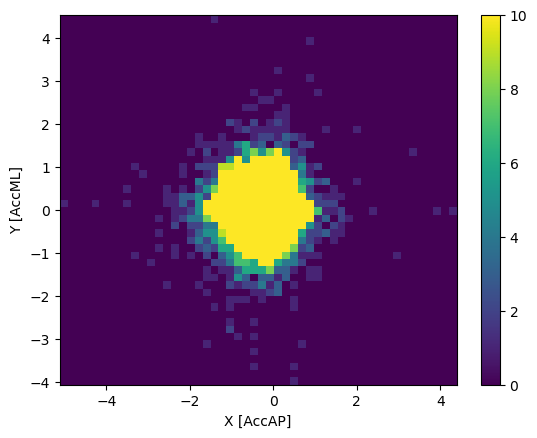

In [25]:
plt.hist2d(full_defog_dataset['AccAP'], full_defog_dataset['AccML'], bins=(50, 50), vmax=10)
plt.colorbar()
plt.xlabel('X [AccAP]')
plt.ylabel('Y [AccML]')
ax = plt.gca()
ax.axis('tight')


(-5.11864978411452, 4.38813217402119, -6.0247007636841, 4.45836454343802)

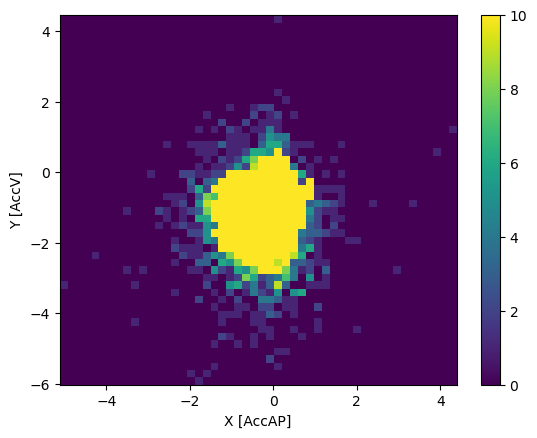

In [26]:
plt.hist2d(full_defog_dataset['AccAP'], full_defog_dataset['AccV'], bins=(50, 50), vmax=10)
plt.colorbar()
plt.xlabel('X [AccAP]')
plt.ylabel('Y [AccV]')
ax = plt.gca()
ax.axis('tight')


(-6.0247007636841, 4.45836454343802, -4.05920119812201, 4.52403760623424)

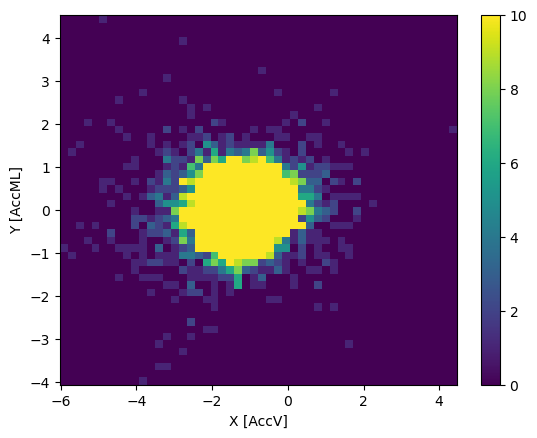

In [27]:
plt.hist2d(full_defog_dataset['AccV'], full_defog_dataset['AccML'], bins=(50, 50), vmax=10)
plt.colorbar()
plt.xlabel('X [AccV]')
plt.ylabel('Y [AccML]')
ax = plt.gca()
ax.axis('tight')


#### Remove some unecessary labels and clean

In [28]:
remove_col = ['ID','Time', 'Valid', 'Task']
clean_defog_dataset = full_defog_dataset.drop(full_defog_dataset[remove_col],axis=1)
clean_defog_dataset.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,-0.843750,0.09375,-0.671875,0,0,0,1.0
1,-0.843750,0.09375,-0.671875,0,0,0,1.0
2,-0.843750,0.09375,-0.671875,0,0,0,1.0
3,-0.842422,0.09375,-0.671875,0,0,0,1.0
4,-0.828125,0.09375,-0.671875,0,0,0,1.0


In [29]:
# check duplication and null

clean_defog_dataset.duplicated().sum(), clean_defog_dataset.isna().sum()

(1492483,
 AccV               0
 AccML              0
 AccAP              0
 StartHesitation    0
 Turn               0
 Walking            0
 All_zero           0
 dtype: int64)

In [30]:
clean_defog_dataset.drop_duplicates(inplace=True)
clean_defog_dataset.duplicated().sum()

0

In [31]:
clean_defog_dataset.shape

(12033219, 7)

In [32]:
# clean_defog_dataset.to_parquet('Data/clean/clean_defog_dataset.parquet')
clean_defog_dataset.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,-0.843750,0.09375,-0.671875,0,0,0,1.0
3,-0.842422,0.09375,-0.671875,0,0,0,1.0
4,-0.828125,0.09375,-0.671875,0,0,0,1.0
13,-0.828125,0.09375,-0.660301,0,0,0,1.0
14,-0.828125,0.09375,-0.666720,0,0,0,1.0


In [33]:
condition = (clean_defog_dataset.StartHesitation == 0) & (clean_defog_dataset.Turn == 0 ) & (clean_defog_dataset.Walking == 0)
total_zero = clean_defog_dataset[condition].shape[0]
total_zero

11377528

In [34]:
All_zero = clean_defog_dataset[clean_defog_dataset.All_zero == 1].shape[0]
All_zero

11377528

In [35]:
a = clean_defog_dataset[clean_defog_dataset.StartHesitation == 1].shape[0]
a

492

In [36]:
b = clean_defog_dataset[clean_defog_dataset.Walking == 1].shape[0]
b

98225

In [37]:
c = clean_defog_dataset[clean_defog_dataset.Turn == 1].shape[0]
c

556974

In [38]:
All_zero == total_zero

True

In [39]:
clean_defog_dataset.shape[0] == a + b + c + All_zero

True

### Feature and Labels

In [40]:
feature_col = ['AccV','AccML','AccAP']
label_col = ['StartHesitation','Turn','Walking', 'All_zero']

feature_dataset = clean_defog_dataset[feature_col]
label_dataset = clean_defog_dataset[label_col]

In [41]:
feature_dataset.head(), label_dataset.head()

(        AccV    AccML     AccAP
 0  -0.843750  0.09375 -0.671875
 3  -0.842422  0.09375 -0.671875
 4  -0.828125  0.09375 -0.671875
 13 -0.828125  0.09375 -0.660301
 14 -0.828125  0.09375 -0.666720,
     StartHesitation  Turn  Walking  All_zero
 0                 0     0        0       1.0
 3                 0     0        0       1.0
 4                 0     0        0       1.0
 13                0     0        0       1.0
 14                0     0        0       1.0)

#### Oversampling with SMOTE

In [42]:
from imblearn.over_sampling import SMOTE
import numpy as np
# Instantiate the MultiLabelUnderSampler
over_sampler = SMOTE()

# Undersample the dataset
X_resampled, y_resampled = over_sampler.fit_resample(feature_dataset.to_numpy(), label_dataset.to_numpy())

In [43]:
feature_dataset.shape

(12033219, 3)

In [44]:
SMOTE_features_dataset = pd.DataFrame(X_resampled, columns=feature_dataset.columns)
SMOTE_features_dataset.shape

(45510112, 3)

In [45]:
SMOTE_labels_dataset = pd.DataFrame(y_resampled, columns=label_dataset.columns)
SMOTE_labels_dataset.shape

(45510112, 4)

In [46]:
a = SMOTE_labels_dataset[SMOTE_labels_dataset.StartHesitation == 1].shape[0]
b = SMOTE_labels_dataset[SMOTE_labels_dataset.Turn == 1].shape[0]
c = SMOTE_labels_dataset[SMOTE_labels_dataset.Walking ==1].shape[0]
d = SMOTE_labels_dataset[SMOTE_labels_dataset.All_zero == 1].shape[0]
a , b, c, d

(11377528, 11377528, 11377528, 11377528)

In [47]:
SMOTE_labels_dataset.shape[0] == a + b + c + d

True

In [48]:
oversampling_defog_dataset = pd.concat([SMOTE_features_dataset,SMOTE_labels_dataset], ignore_index= False, sort=False, axis=1)
oversampling_defog_dataset.shape[0]

45510112

In [49]:
# oversampling_defog_dataset.to_parquet('Data/clean/oversampling_defog_dataset.parquet')
oversampling_defog_dataset.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,-0.843750,0.09375,-0.671875,0,0,0,1
1,-0.842422,0.09375,-0.671875,0,0,0,1
2,-0.828125,0.09375,-0.671875,0,0,0,1
3,-0.828125,0.09375,-0.660301,0,0,0,1
4,-0.828125,0.09375,-0.666720,0,0,0,1


### 70% Train Data, 10% Validation Data, 20% Test Data


80% Set Data(60% Train Data, 20% Validation Data) , 20% Test Data

In [50]:
from sklearn.model_selection import train_test_split
import random 
random_seed = 54

set_defog_data, test_defog_data = train_test_split(oversampling_defog_dataset, test_size=0.2, random_state=True)
set_defog_data.shape, test_defog_data.shape

: 

: 

In [ ]:
oversampling_defog_dataset.shape[0] == set_defog_data.shape[0] + test_defog_data.shape[0]

In [ ]:
set_defog_data.head()

#### Check all class are equal


In [ ]:
a = set_defog_data[set_defog_data.StartHesitation == 1].shape[0]
b = set_defog_data[set_defog_data.Turn == 1].shape[0]
c = set_defog_data[set_defog_data.Walking == 1].shape[0]
d = set_defog_data[set_defog_data.All_zero == 1].shape[0]
a, b, c, d

In [ ]:
set_defog_data.shape[0] == a + b + c + d

In [ ]:
a = test_defog_data[test_defog_data.StartHesitation == 1].shape[0]
b = test_defog_data[test_defog_data.Turn == 1].shape[0]
c = test_defog_data[test_defog_data.Walking == 1].shape[0]
d = test_defog_data[test_defog_data.All_zero == 1].shape[0]
a, b, c, d

In [ ]:
test_tdcsfog_data.shape[0] == a + b + c + d

In [ ]:
# # Save process data

# set_tdcsfog_data.to_parquet('Data/Process/set_tdcsfog_data.parquet')
# test_tdcsfog_data.to_parquet('Data/Process/test_tdcsfog_data.parquet')

In [ ]:
test_tdcsfog_data.duplicated().sum()

In [ ]:
set_tdcsfog_data.duplicated().sum()